In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path='/content/drive/MyDrive/Datasets/plant_village_keras2/train'
test_path='/content/drive/MyDrive/Datasets/plant_village_keras2/test'
val_path='/content/drive/MyDrive/Datasets/plant_village_keras2/val'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=val_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 43460 images belonging to 38 classes.
Found 5421 images belonging to 38 classes.
Found 5463 images belonging to 38 classes.


In [ ]:
test_batches_5 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=9, seed=37)

Found 5463 images belonging to 38 classes.


In [ ]:
imgs, labels= next(test_batches_5)

In [ ]:
CLASS_NAMES = ['Apple scab','Apple Black rot','Apple rust','Apple healthy','Blueberry healthy','Cherry Powdery mildew','Cherry healthy','Corn Cercospora Gray leaf spot','Corn Common rust','Corn Northern Leaf Blight','Corn healthy','Grape Black rot','Grape Esca','Grape Leaf blight','Grape healthy','Orange Haunglongbing','Peach Bacterial spot','Peach healthy','Pepper Bacterial spot','Pepper healthy','Potato Early blight','Potato Late blight','Potato healthy','Raspberry healthy','Soybean healthy','Squash Powdery mildew','Strawberry Leaf scorch','Strawberry healthy','Tomato Bacterial spot','Tomato Early blight','Tomato Late blight','Tomato Leaf Mold','Tomato Septoria leaf spot','Tomato Spider mites','Tomato Target Spot','Tomato Yellow Leaf Curl Virus','Tomato mosaic virus','Tomato healthy']

In [ ]:
labels=np.argmax(labels, axis=-1)

In [ ]:
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(3, 3, figsize=(8,5))
    axes = axes.flatten()
    for img, ax, label in zip( images_arr, axes, labels):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(CLASS_NAMES[label])
    plt.tight_layout()
    plt.show()

In [ ]:
# plt.figure(figsize=(10, 10))
# for image_batch, labels_batch in imgs, labels:
#   ax = plt.subplot(2, figsize=(10,10))
#   plt.imshow(image_batch)
#   plt.title(test_batches.class_indices[labels_batch[i]])
#   plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


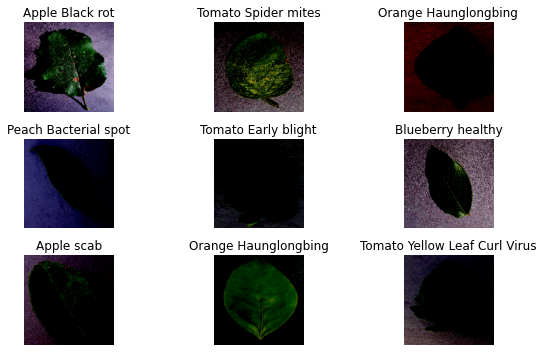

In [ ]:
plotImages(imgs,labels)

In [ ]:
test_batches_6 = ImageDataGenerator(preprocessing_function=None) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=9, seed=37)

Found 5463 images belonging to 38 classes.


In [ ]:
def plotImages2(images_arr, labels):
    fig, axes = plt.subplots(3, 3, figsize=(8,5))
    axes = axes.flatten()
    for img, ax, label in zip( images_arr, axes, labels):
        ax.imshow(img/255)
        ax.axis('off')
        ax.set_title(CLASS_NAMES[label])
    plt.tight_layout()
    plt.show()

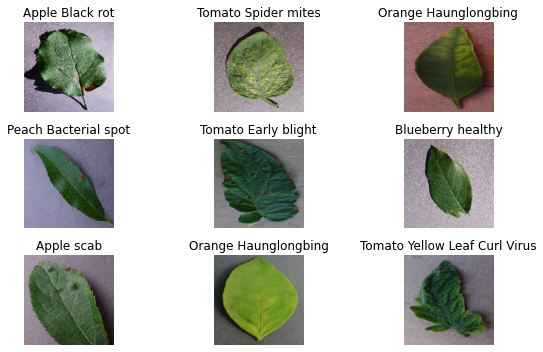

In [ ]:
imgs, labels= next(test_batches_6)
labels=np.argmax(labels, axis=-1)
plotImages2(imgs,labels)

In [ ]:
# model = Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Flatten(),
#     Dense(units=2, activation='softmax')
# ])

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Models/Model_keras_plantvillage_full')

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

547/547 [==============================] - 2484s 5s/step


In [ ]:
score=model.evaluate(test_batches)

547/547 [==============================] - 23s 40ms/step - loss: 0.0238 - accuracy: 0.9934


In [ ]:
test_batches.classes

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_batches.classes, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        28
           3       0.98      1.00      0.99       165
           4       1.00      1.00      1.00       152
           5       1.00      1.00      1.00       106
           6       1.00      1.00      1.00        86
           7       0.88      0.98      0.93        52
           8       1.00      1.00      1.00       120
           9       0.99      0.93      0.96        99
          10       1.00      1.00      1.00       117
          11       1.00      1.00      1.00       118
          12       1.00      1.00      1.00       139
          13       1.00      1.00      1.00       109
          14       1.00      1.00      1.00        43
          15       1.00      1.00      1.00       553
          16       1.00      1.00      1.00       231
          17       1.00    

In [ ]:
report = classification_report(test_batches.classes, np.argmax(predictions, axis=1), output_dict=True)

In [ ]:
report

{'0': {'f1-score': 0.975609756097561,
  'precision': 1.0,
  'recall': 0.9523809523809523,
  'support': 63},
 '1': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 63},
 '10': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 117},
 '11': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 118},
 '12': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 139},
 '13': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 109},
 '14': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 43},
 '15': {'f1-score': 0.9990950226244344,
  'precision': 1.0,
  'recall': 0.9981916817359855,
  'support': 553},
 '16': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 231},
 '17': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 36},
 '18': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 101},
 '19': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 149},
 '2': {'f1-score': 1.0, 'precision'

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(report).transpose()

In [ ]:
print(df.to_latex(index=False)) 

\begin{tabular}{rrrr}
\toprule
 precision &   recall &  f1-score &    support \\
\midrule
  1.000000 & 0.952381 &  0.975610 &   63.00000 \\
  1.000000 & 1.000000 &  1.000000 &   63.00000 \\
  1.000000 & 1.000000 &  1.000000 &   28.00000 \\
  0.982143 & 1.000000 &  0.990991 &  165.00000 \\
  1.000000 & 1.000000 &  1.000000 &  152.00000 \\
  1.000000 & 1.000000 &  1.000000 &  106.00000 \\
  1.000000 & 1.000000 &  1.000000 &   86.00000 \\
  0.879310 & 0.980769 &  0.927273 &   52.00000 \\
  1.000000 & 1.000000 &  1.000000 &  120.00000 \\
  0.989247 & 0.929293 &  0.958333 &   99.00000 \\
  1.000000 & 1.000000 &  1.000000 &  117.00000 \\
  1.000000 & 1.000000 &  1.000000 &  118.00000 \\
  1.000000 & 1.000000 &  1.000000 &  139.00000 \\
  1.000000 & 1.000000 &  1.000000 &  109.00000 \\
  1.000000 & 1.000000 &  1.000000 &   43.00000 \\
  1.000000 & 0.998192 &  0.999095 &  553.00000 \\
  1.000000 & 1.000000 &  1.000000 &  231.00000 \\
  1.000000 & 1.000000 &  1.000000 &   36.00000 \\
  1.000000

# **Useless below**

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output

In [ ]:
hidden=tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
output = Dense(units=38, activation='softmax')(hidden)

In [ ]:
model =Model(inputs=mobile.input, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
history=model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=20,
    verbose=1
)

Epoch 1/20
4346/4346 [==============================] - 242s 53ms/step - loss: 0.2360 - accuracy: 0.9355 - val_loss: 0.0624 - val_accuracy: 0.9819
Epoch 2/20
4346/4346 [==============================] - 214s 49ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0521 - val_accuracy: 0.9849
Epoch 3/20
4346/4346 [==============================] - 207s 48ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0448 - val_accuracy: 0.9873
Epoch 4/20
4346/4346 [==============================] - 207s 48ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0382 - val_accuracy: 0.9899
Epoch 5/20
4346/4346 [==============================] - 207s 48ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0408 - val_accuracy: 0.9889
Epoch 6/20
4346/4346 [==============================] - 207s 48ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0397 - val_accuracy: 0.9902
Epoch 7/20
4346/4346 [==============================] - 207s 48ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0

In [ ]:
model.save('/content/drive/MyDrive/Models/Model_keras_plantvillage_full')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Model_keras_plantvillage_full/assets


In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

547/547 [==============================] - 24s 43ms/step


In [ ]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams["figure.figsize"] = (35,35)

In [ ]:
test_batches.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry___Powdery_mildew': 5,
 'Cherry___healthy': 6,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn___Common_rust': 8,
 'Corn___Northern_Leaf_Blight': 9,
 'Corn___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Tomato___Late_blight': 30,
 'Tomato___Leaf_Mold': 31,
 'Tomato___Septor

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization


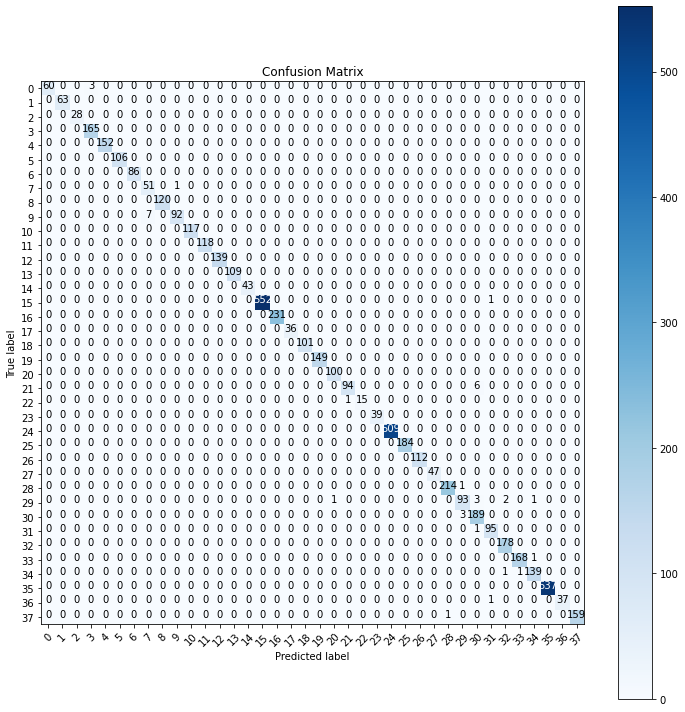

In [ ]:

#cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37']
#plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Normalized confusion matrix


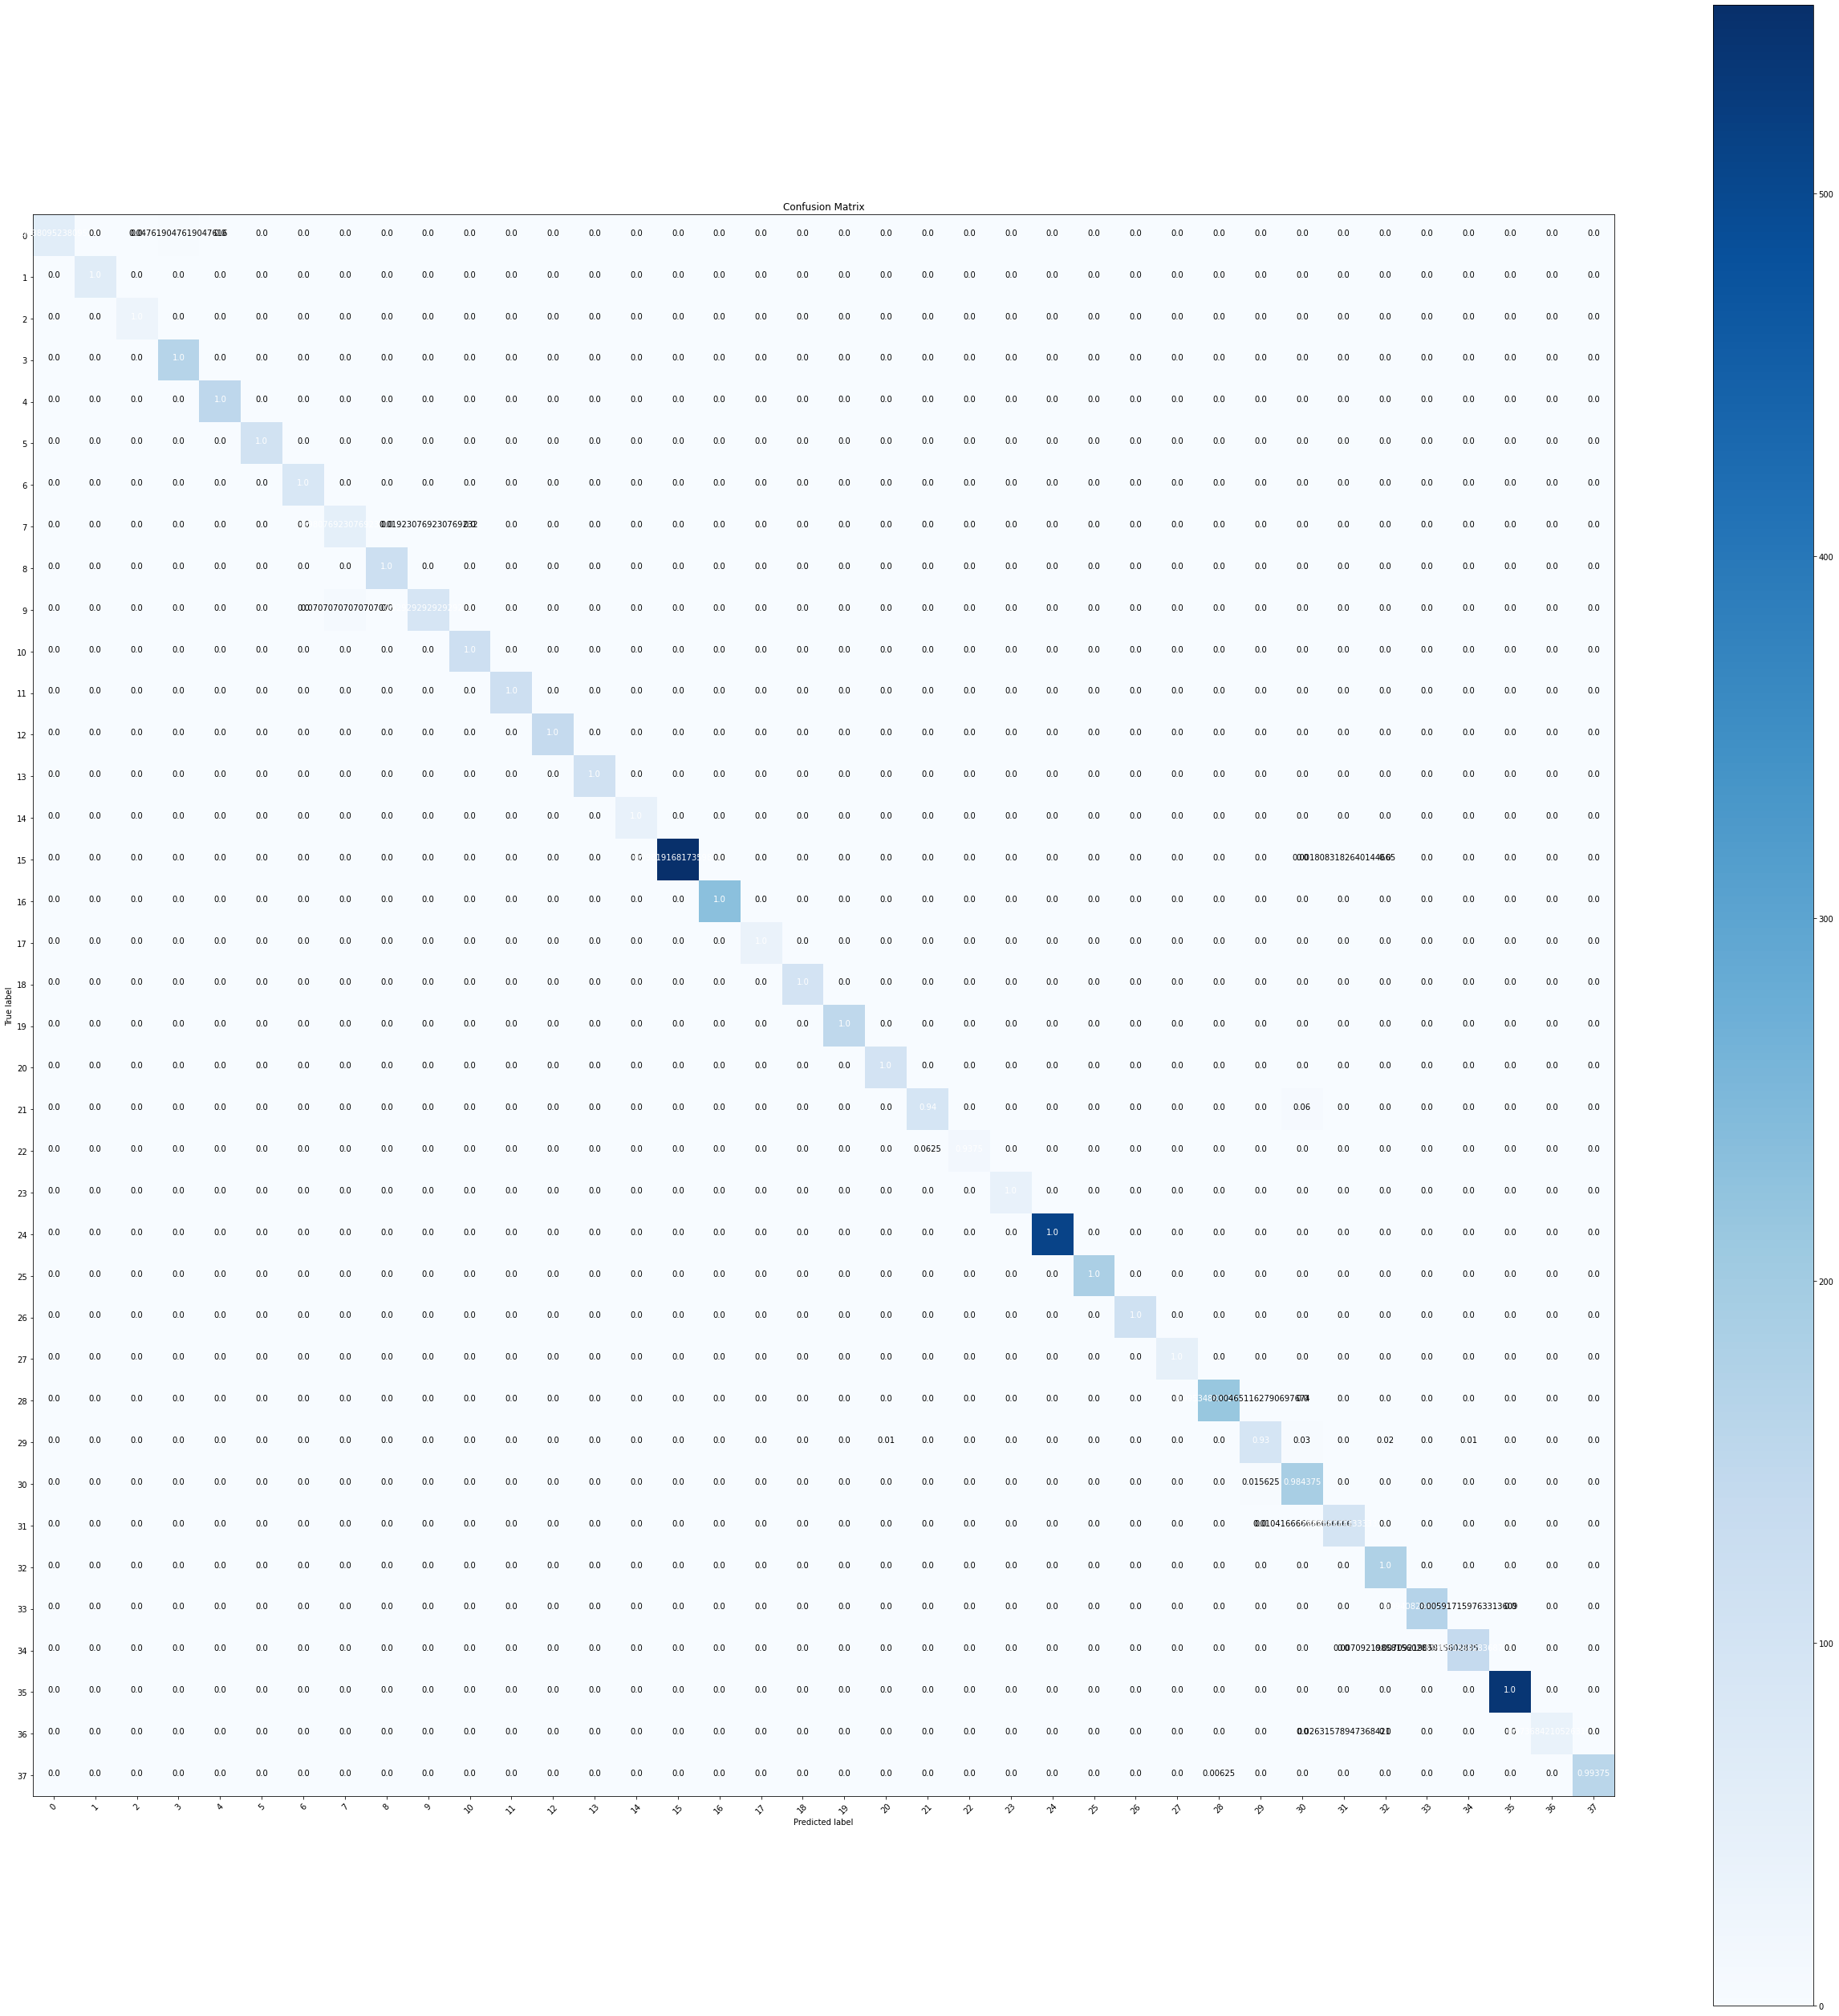

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize=True)

In [ ]:
score=model.evaluate(test_batches)

547/547 [==============================] - 22s 40ms/step - loss: 0.0238 - accuracy: 0.9934


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

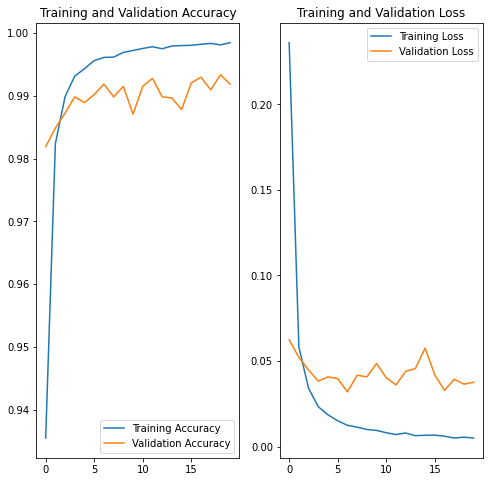

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Random_Samples/Strawberry-Leaf-Diseases.jpg', target_size=(224, 224))

In [ ]:
type(image)

PIL.Image.Image

In [ ]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

In [ ]:
preprocessed_image=tf.keras.applications.mobilenet.preprocess_input(input_arr)

In [ ]:
type(preprocessed_image)

numpy.ndarray

In [ ]:
predictions = model.predict(preprocessed_image)

In [ ]:
predictions

array([[4.3178922e-10, 2.2456262e-12, 3.3605694e-19, 2.5595946e-17,
        3.5756313e-18, 2.3556100e-16, 5.0985630e-17, 2.4037540e-18,
        1.6785198e-18, 8.0858379e-16, 1.9065601e-25, 1.2280614e-15,
        1.5575317e-18, 2.3082231e-10, 3.7310382e-19, 2.1176328e-20,
        9.8643678e-15, 7.6048370e-25, 4.0425649e-11, 5.8666235e-23,
        4.8372362e-15, 2.1827983e-18, 7.6966271e-24, 8.8117160e-16,
        7.5525481e-15, 4.8015730e-14, 9.9966824e-01, 1.1956809e-13,
        3.5343343e-20, 3.6466327e-15, 6.0893154e-19, 6.0766551e-16,
        3.3172106e-04, 7.2840614e-20, 7.5451895e-19, 1.7710740e-16,
        1.9123109e-21, 4.0468451e-23]], dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions, axis=-1)
predicted_class[0]

26